In [101]:
# импортируйте нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
import pandas as pd
random_seed=2423

In [3]:
np.random.seed(random_seed)

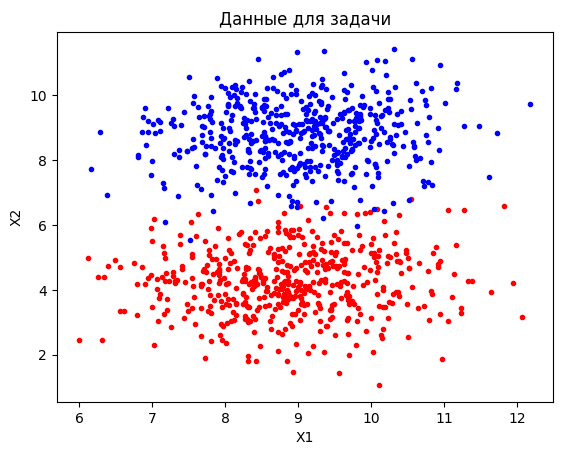

In [4]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации
# размером n=100 сгенерировал 
np.random.seed(452)
X, y_true = sklearn.datasets.make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y_true == 0], X[:, 1][y_true == 0], 'r.')
plt.plot(X[:, 0][y_true == 1], X[:, 1][y_true == 1], 'b.')
plt.title('Данные для задачи')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
$f(z) = \dfrac{1}{1 + e^{-z}}$

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида: $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 - ... - w_mx_m}}$

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

In [4]:
# посмотрели на данные
X[:5, :]

array([[ 9.45505157,  3.37013418],
       [ 8.34274249,  5.23094842],
       [ 8.64146126,  8.6423887 ],
       [ 6.2548275 ,  4.38766476],
       [ 7.89458094, 10.52870574]])

In [5]:
# разделили выборку
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = .2, shuffle=True, random_state=random_seed)

In [6]:
# стандартизировали
scaler = StandardScaler()
scaler.fit(X_train)
x_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

#### Задание №2. Напишите собственную логистическую регрессию

Имеем задачу минимизации сложной функции потерь $L$ по параметрам $(w, b)$:

$x = (x_1, x_2)$

$y^* = w^Tx + b$

$z^* = \sigma(y^*)$, $\sigma_i(y) = \frac{1}{1 + e^{-y_i}}$

$L(z^*) = \frac{1}{n} \sum_{i=1} ^{n} [y_i ln(z_i^*) - (1-y_i) ln(1-z_i^*)]$, где $y$ - истинные значения класса, $z^*$ - предсказанные

Производная сложной функции $L(z(y(x)))$ вычисляется из применения цепного правила дифференцирования к композиции функций, вложенных в сложную, а для $n$-мерных функциий есть произведение матриц Якоби в точке. Тогда для каждого шага градиенного спуска будем вычислять это матричное произведение, учитывая, что:

1. матрица Якоби для $y^*$ есть матрица $w^T$ в любой точке области определения $y^*$;
2. матрица Якоби для для $z^*$ по $i$-ой $y^*$: $\frac{d\mathcal{z^*_i}}{dy^*_i} = \frac{d(\mathcal{\frac{1}{1+e^{-y^*_i}}})}{dy^*_i} = \frac{\mathcal{0*(1+e^{-y^*_i})-e^{-y^*_i}*(-1)*1}}{(1+e^{-y^*_i})^2} = \frac{1}{1+e^{-y^*_i}} + \frac{1}{(1+e^{-y^*_i})^2}$ = |через $\sigma(y^*_i)$| = $\sigma(y^*_i)(1-\sigma(y^*_i))$ - на главной диагонали квадратной матрицы $n$ x $n$, что и есть матрица Якоби (остальные элементы матрицы - нули, так как $z^*$, по сути, вектор-столбец $\begin{pmatrix} \sigma(y^*_1) \\ ... \\ \sigma(y^*_n) \end{pmatrix}$, где каждая сигма компонента зависит только от одной функции $y^*_i$, соответственно, производные сигмоид от иных $y^*_i$ = 0)
3. матрица Якоби для $L$ по $i$-ой $z^*$ есть вектор-строка (1 x $n$) средних от суммы $i$-х производных $\frac{d(\mathcal{y_iln\sigma_i - (1-y_i)ln(1-\sigma_i)})}{d\sigma_i} = - (\frac{y_i}{\sigma_i} - \frac{1-y_i}{1-\sigma_i})$ = |к общему знаменателю| = $- \frac{y_i - y_i\sigma_i - \sigma_i + y_i\sigma_i}{\sigma_i(1-\sigma_i)} = - \frac{y_i - \sigma_i}{\sigma_i(1-\sigma_i)}$

Таким образом, будем вычислять матричное произведение, умноженное на шаг градиентного спуска с минусом, то есть шагать в сторону антиградиента, прибавлять $w_j$.

In [7]:
# функции для шага градиентного спуска

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f_z(y):
    return sigmoid(y)

def jacobi_z(y):
    return np.diag(sigmoid(y) * (1-sigmoid(y)))

def jacobi_l(z, y):
    return np.array([np.sum((z[i]-y)/(z[i]*(1-z[i])))/len(y) for i in range(len(z))])

In [8]:
!pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\artra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from tqdm import tqdm

In [26]:
class MyLogRegression:
    
    def __init__(self):
        np.random.seed(random_seed)
        # задаю случайно начальные значения, близкие к 0
        self.w = np.random.normal(size=(2, ))*1e-3
        self.b = np.random.normal(size=(1, ))*1e-3
    def fit(self, X, y, lr=1.0003818e-2, iter=40):
        m, n = X.shape
        for _ in range(iter):
            f = X @ self.w + self.b
            z = f_z(f)
            dL_w = jacobi_l(z, y) @ jacobi_z(f) @ X # градиент L(w, b) по w
            dL_b = jacobi_l(z, y) @ jacobi_z(f) @ np.ones((m, n)) # градиент L(w, b) по b
            self.w = self.w - lr * dL_w # шаг
            self.b = self.b - lr * dL_b[0]
    def predict(self, X):
        return np.array(f_z(X @ self.w + self.b))
    def score(self, X, y):
        # считаю accuracy c порогом 0.5
        return np.sum((np.array(f_z(X @ self.w + self.b)) > 0.5) == y)/len(y)*100

In [78]:
# буду также подбирать разные learning_rate, чтобы потом построить модель с лучшей accuracy
def tuning_lr(lr_start, lr_step, N, iteration, dict):
    l_rate = lr_start
    for _ in tqdm(range(N)):
        l_rate += lr_step
        logreg = MyLogRegression()
        logreg.fit(x_scaled, y_train, l_rate, iteration)
        dict['scores'].append(logreg.score(x_test_scaled, y_test))
        dict['lrs'].append(l_rate)
    return dict

In [98]:
# то же самое для количества эпох
def tuning(lr_start, lr_step, N, iter_start, iter_step, M):
    dict_tuning={'scores': [], 
             'lrs': [],
             'iter': []
             }
    iter = iter_start
    for _ in tqdm(range(M)):
        iter+=iter_step
        dict=tuning_lr(lr_start, lr_step, N, iter, dict_tuning)
        dict_tuning['scores']=dict['scores']
        dict_tuning['lrs']=dict['lrs']
        for _ in range(N):
            dict_tuning['iter'].append(iter)
    return dict_tuning

In [100]:
df = tuning(1.00035e-2, 1e-8, 50, 20, 5, 20)

100%|██████████| 20/20 [58:22<00:00, 175.13s/it]


In [102]:
data = pd.DataFrame(df)

In [128]:
data.sample(5)

,scores,lrs,iter
835,9.5,0.010004,105
90,87.5,0.010004,30
945,9.5,0.010004,115
48,46.5,0.010004,25
696,87.0,0.010004,90


In [116]:
# ищем макс. accuracy
data[data.scores==data.scores.max()].iloc[0, :]

scores    89.500000
lrs        0.010004
iter      40.000000
Name: 151, dtype: float64

In [130]:
# например
lr_opt = data[data.scores==data.scores.max()].iloc[0, :][1]
iter_opt = int(data[data.scores==data.scores.max()].iloc[0, :][2])
print(lr_opt, iter_opt)

0.01000352 40


In [132]:
logreg = MyLogRegression()
logreg.fit(x_scaled, 
           y_train, 
           lr=lr_opt, 
           iter=iter_opt
           )

In [133]:
test_pred = logreg.predict(x_test_scaled)
test_pred

array([0.50410391, 0.50213743, 0.50247044, 0.50051661, 0.49926519,
       0.50101063, 0.49837652, 0.50153495, 0.502363  , 0.49944244,
       0.50113627, 0.49883363, 0.49734642, 0.49913915, 0.49773934,
       0.4970344 , 0.50006199, 0.50200701, 0.5032478 , 0.50366449,
       0.49790291, 0.50053691, 0.49912608, 0.50275911, 0.50229488,
       0.50150526, 0.50446611, 0.5010026 , 0.49687825, 0.50104141,
       0.50089848, 0.4999381 , 0.49866465, 0.49804544, 0.49902532,
       0.49779674, 0.49833959, 0.50286769, 0.50176616, 0.49943222,
       0.50288482, 0.50125786, 0.49791965, 0.50235341, 0.50237519,
       0.50194573, 0.50266769, 0.50121544, 0.49921427, 0.50100724,
       0.50197119, 0.50308125, 0.49851127, 0.5016361 , 0.50081599,
       0.5013339 , 0.49766163, 0.50173461, 0.5022757 , 0.49797315,
       0.502016  , 0.49795121, 0.50145437, 0.50295495, 0.5010727 ,
       0.50242831, 0.49796089, 0.49676298, 0.49757047, 0.4991647 ,
       0.49731435, 0.50067592, 0.50112978, 0.50087563, 0.50059

In [134]:
# accuracy
logreg.score(x_test_scaled, y_test)

89.5

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [135]:
lore=LogisticRegression()
lore.fit(x_scaled, y_train)
lore.predict(x_test_scaled)
lore.score(x_test_scaled, y_test)*100

99.0

89,5 < 99 =(